<a href="https://colab.research.google.com/github/jkauffm4/Intro-to-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Define functions for ML Linear Regression

In [ ]:
def plot_loss(iterations, cost_history):
  mplot.plot(range(1, iterations + 1), cost_history, color='blue')
  mplot.rcParams["figure.figsize"] = (10, 6)
  mplot.grid(True)

  mplot.xlabel('Number of iterations')
  mplot.ylabel('Cost (J)')
  mplot.title('Convergence of gradient descent')

# Show the plot
  mplot.show()

In [ ]:
def plot_loss_training_validation(iterations, cost_history_training, cost_history_validation):
  mplot.plot(cost_history_training, label="Training Loss")
  mplot.plot(cost_history_validation, label="Validation Loss")
  mplot.rcParams["figure.figsize"] = (10, 6)
  mplot.grid(True)

  mplot.xlabel('Number of iterations')
  mplot.ylabel('Cost (J)')
  mplot.title('Training and Validation Loss')
  mplot.legend()
# Show the plot
  mplot.show()

In [ ]:
#varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})
#test = binary_map(varlist)

Load in data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
file_path = '/content/drive/My Drive/Intro-to-ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
sample[varlist] = sample[varlist].apply(binary_map)
np.random.seed(0)
train_set, test_set = train_test_split(sample, train_size = .8, test_size = .2, random_state = 100)
Y = train_set.pop('price')
Y_test = test_set.pop('price')
junk = train_set.pop('furnishingstatus') #Gotta remove this, its not used
junk = test_set.pop('furnishingstatus') #Same with this
blerg = train_set
train_set_all = train_set.to_numpy()
test_set_all = test_set.to_numpy()
# Theres a better way to get out the values here, but I don't know it
junk = train_set.pop('mainroad')
junk = train_set.pop('guestroom')
junk = train_set.pop('hotwaterheating')
junk = train_set.pop('basement')
junk = train_set.pop('airconditioning')
junk = train_set.pop('prefarea')
junk = test_set.pop('mainroad')
junk = test_set.pop('guestroom')
junk = test_set.pop('hotwaterheating')
junk = test_set.pop('basement')
junk = test_set.pop('airconditioning')
junk = test_set.pop('prefarea')
X_train = train_set.to_numpy()
X_test = test_set.to_numpy()
Y = Y.to_numpy()
Y_test = Y_test.to_numpy()
size = len(X_train)
x0 = np.ones((size,1))
X_new_train = np.concatenate((x0,X_train), axis=1)
x0 = np.ones((len(X_test),1))
X_new_test = np.hstack((x0, X_test))

In [ ]:
def gradient_descent(X, Y, X_validation, Y_validation, theta, alpha, iterations):
  m = len(Y)
  cost_history_training = np.zeros(iterations)
  cost_history_validation = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.T.dot(errors)
    theta -= sum_delta
    cost_history_training[i] = compute_cost(X, Y, theta)
    cost_history_validation[i] = compute_cost(X_validation, Y_validation, theta)

  plot_loss_training_validation(iterations, cost_history_training, cost_history_validation)
  return theta, cost_history

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  L = 1 / (2*m) * np.sum(sqrErrors)
  return L

In [ ]:
theta = np.zeros(X_train.shape[1])
theta = theta.reshape(len(theta),1)
blerg

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3
...,...,...,...,...,...
526,3180,2,1,1,0
53,5150,3,2,4,2
350,3420,2,1,2,1
79,6000,3,2,3,0


1a) Lower values for alpha mean we get more iterations in, but it still eventually goes to infinity

---



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


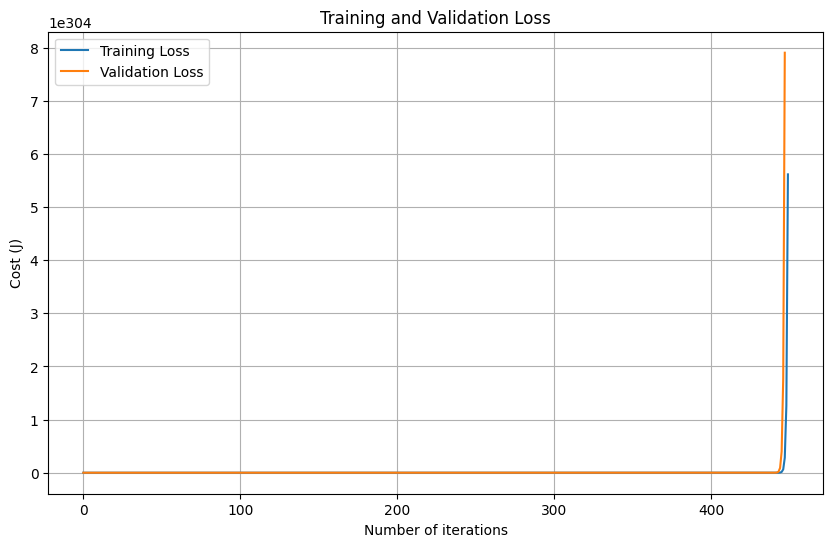

In [ ]:
X = X_new_train                                                # Set data equal to x values without the binary mapped ones
X_test = X_new_test
theta = np.zeros((6,1))                                # Set theta equal to zero
m = len(Y)
Y = Y.reshape(m,1)
iterations = 450                                                    # Probably too many iterations
alpha = .0000001                                                           # Small alpha
regularization = 0                                                    # We aren't doing any regularization
#theta, cost_history_training, cost_history_testing = gradient_descent(X_train, X_test, Y, Y_test, theta, alpha, iterations, regularization)
#theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
#print('Final Value of theta = ', theta)
#theta_x1 = theta                                                      # Save theta values
#plot_loss(iterations, cost_history)                          # Plot loss function
theta, cost_history = gradient_descent(X, Y, X_test, Y_test, theta, alpha, iterations)

1b) Same problems as 1a

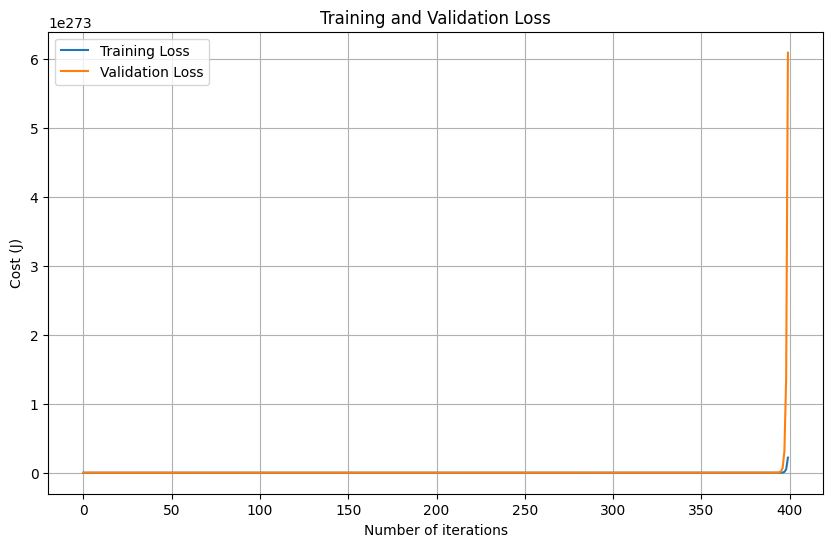

In [ ]:
X = train_set_all
X_test = test_set_all
theta = np.zeros((12,1))
m = len(Y)
Y = Y.reshape(m,1)
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
iterations = 400
alpha = .0000001
theta, cost_history = gradient_descent(X, Y, X_test, Y_test, theta, alpha, iterations)

Defining functions for when we use regularization

In [ ]:
def gradient_descent_regularization(X_train, Y_training, X_test, Y_validation, theta, alpha, iterations, regularization):
  m = len(Y_training)
  cost_history_training = np.zeros(iterations)
  cost_history_validation = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors_training = np.subtract(predictions, Y_training)
    predictions = X_test.dot(theta)
    sum_delta = (1 / m) * X_train.transpose().dot(errors_training)
    theta = theta * (1 - alpha * regularization / m) - (alpha * sum_delta)
    cost_history_training[i] = compute_cost_regularization(X_train, Y_training, theta, regularization)
    cost_history_validation[i] = compute_cost(X_test, Y_validation, theta)

  plot_loss_training_validation(iterations, cost_history_training, cost_history_validation)
  return theta, cost_history_training, cost_history_validation

In [ ]:
def compute_cost_regularization(X, Y, theta, regularization):
  m = len(Y)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  L = 1 / (2*m) * np.sum(sqrErrors) + (regularization * np.sum(np.square(theta)))
  return L

2a) Min Max normalized input

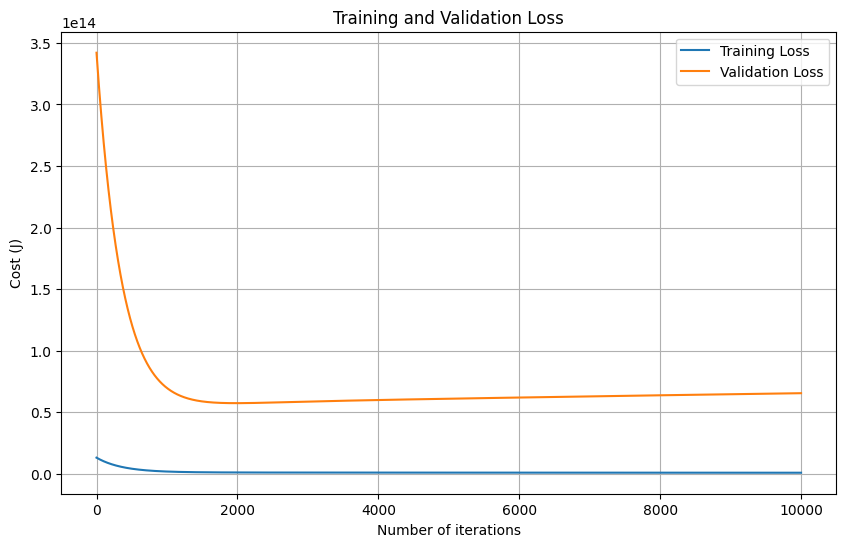

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler      #Will need this later
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
standardized_X_train = StandardScaler().fit_transform(train_set)        #Needed for when we do standardization
standardized_X_test = StandardScaler().fit_transform(test_set)          #Python variables are weird
duplicate_train = train_set
duplicate_test = test_set
duplicate_train[num_vars] = scaler.fit_transform(duplicate_train[num_vars])
duplicate_test[num_vars] = scaler.fit_transform(duplicate_test[num_vars])
X = duplicate_train.to_numpy()
X_test = duplicate_test.to_numpy()
theta = np.zeros((6,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .001
penalization = 0
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)

2a) Standardized input

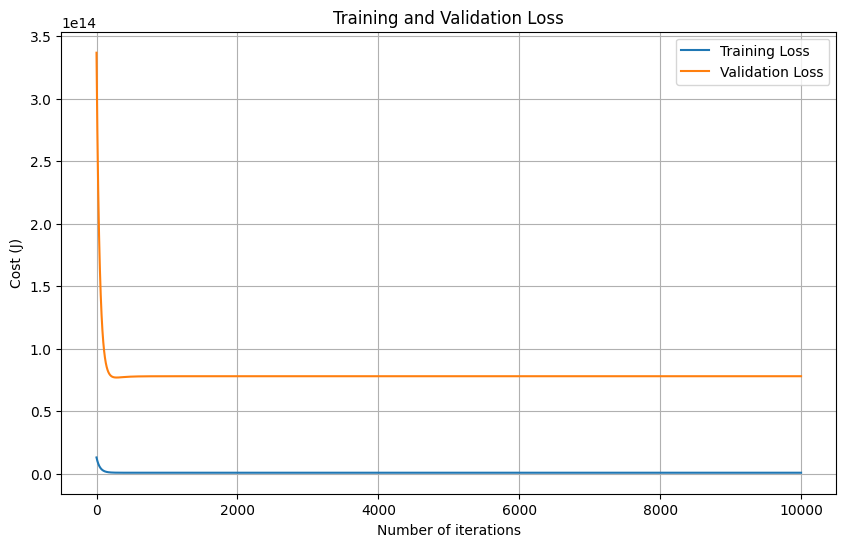

array([[4795729.22018344],
       [ 729932.35589789],
       [  79334.74233423],
       [ 641264.73850837],
       [ 463855.86668604],
       [ 287331.21112435]])

In [ ]:
X = standardized_X_train                    #Later is now
X_test = standardized_X_test                #Defined in the lines above this one
theta = np.zeros((6,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .01
penalization = 0
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta

2b) Min Max Normalized inputs but with all the variables

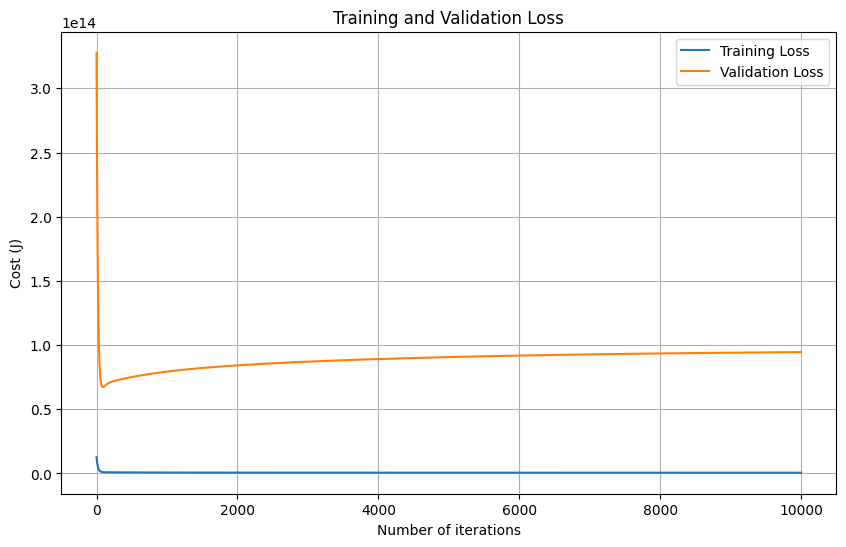

array([[1695301.08696162],
       [3054625.35857305],
       [ 841367.44010102],
       [3167351.6574954 ],
       [1228582.0465604 ],
       [ 662634.77012904],
       [ 425065.16012523],
       [ 291544.43940474],
       [ 911835.78932276],
       [ 902883.3856738 ],
       [ 866261.667597  ],
       [ 631678.58717576]])

In [ ]:
X = scaler.fit_transform(train_set_all)
X_test = scaler.fit_transform(test_set_all)
theta = np.zeros((12,1))
m = len(Y)
Y = Y.reshape(m,1)
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
iterations = 10000
alpha = .01
theta, cost_history = gradient_descent(X, Y, X_test, Y_test, theta, alpha, iterations)
theta

2b) Standardized input instead of min max scaling

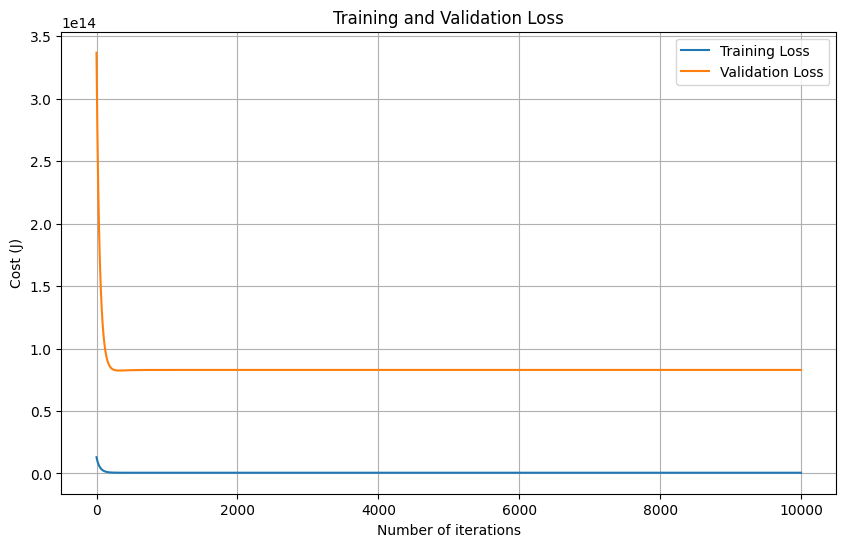

array([[4795729.22018344],
       [ 532835.69216043],
       [  72722.23626589],
       [ 578491.7697621 ],
       [ 367612.68146467],
       [ 210296.49665032],
       [ 146049.33372718],
       [ 145415.81424273],
       [ 204958.54051814],
       [ 399907.03100229],
       [ 222497.59400621],
       [ 255724.44683731]])

In [ ]:
X = StandardScaler().fit_transform(train_set_all)
X_test = StandardScaler().fit_transform(test_set_all)
theta = np.zeros((12,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .01
penalization = 0
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta

3a) Now with penalization

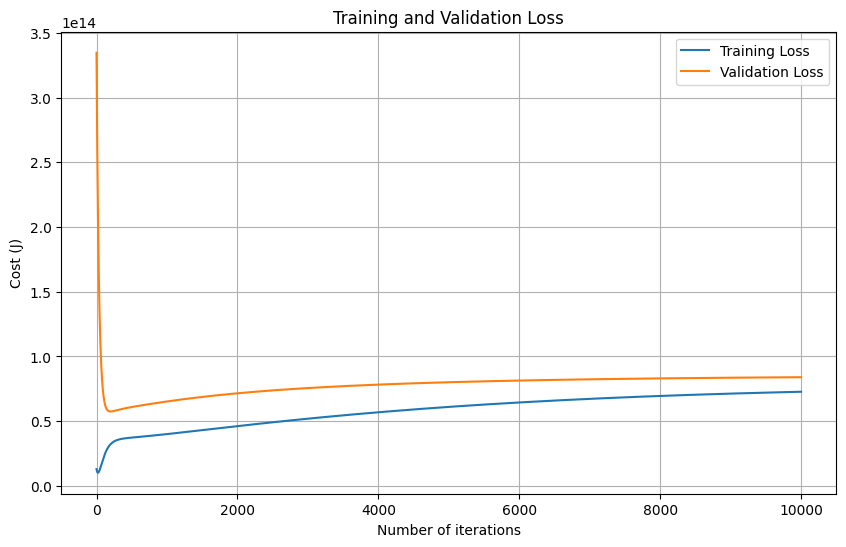

array([[2463698.19160321],
       [3858278.02211901],
       [1031069.89293311],
       [3162329.63233195],
       [1590411.47352181],
       [1190504.23343552]])

In [ ]:
X = duplicate_train.to_numpy()
X_test = duplicate_test.to_numpy()
theta = np.zeros((6,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .01
penalization = 2
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta

3a) Standardized with Penalization

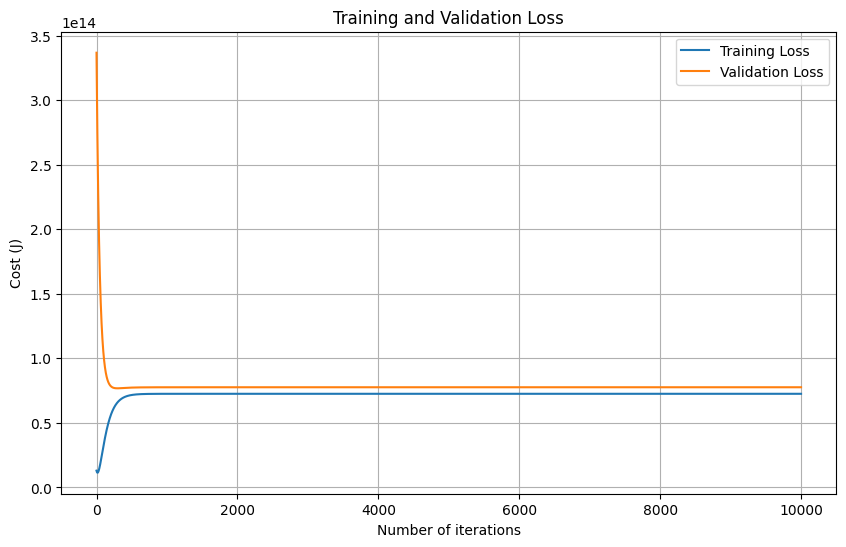

array([[4762956.58314346],
       [ 725548.24151406],
       [  81895.44830644],
       [ 637665.03253379],
       [ 461101.53003885],
       [ 287082.6092582 ]])

In [ ]:
X = standardized_X_train
X_test = standardized_X_test
theta = np.zeros((6,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .01
penalization = 3
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta

3b) Min max normalization with the full data set

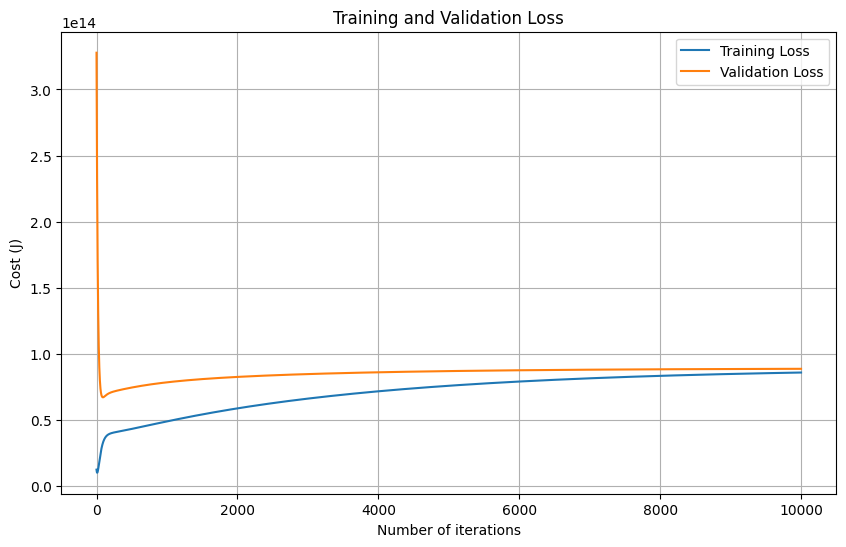

array([[1712807.30457639],
       [2409719.36586899],
       [ 936072.72108316],
       [2546848.06212681],
       [1233048.72619505],
       [ 780638.00755228],
       [ 460619.8028011 ],
       [ 314005.07093054],
       [ 820646.47446943],
       [ 943905.41358935],
       [ 920671.4585383 ],
       [ 637668.00087061]])

In [ ]:
X = scaler.fit_transform(train_set_all)
X_test = scaler.fit_transform(test_set_all)
theta = np.zeros((12,1))
m = len(Y)
Y = Y.reshape(m,1)
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
iterations = 10000
alpha = .01
penalization = 4
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta

3b) Standardized Inputs with Penalization

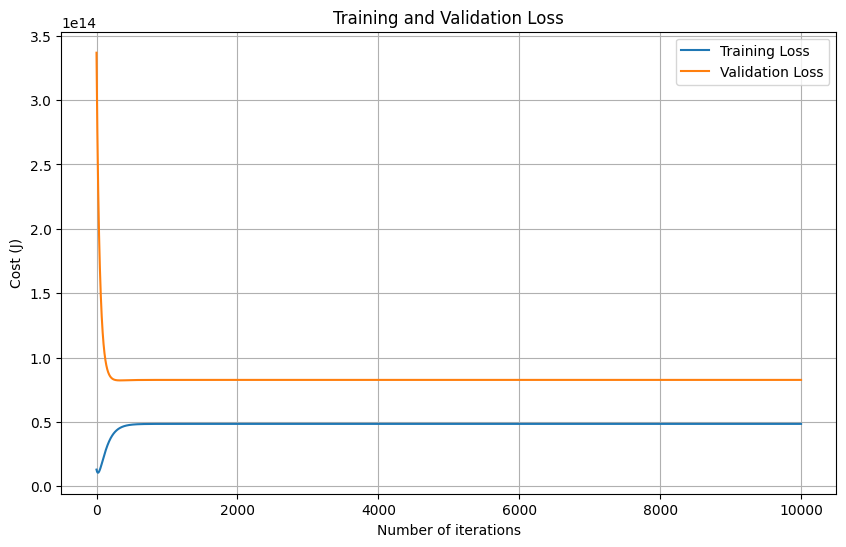

array([[4773830.91324201],
       [ 531025.84251615],
       [  74218.50604517],
       [ 576335.52180557],
       [ 366333.62877807],
       [ 210237.67609322],
       [ 146336.53063109],
       [ 144784.9787419 ],
       [ 203994.09853922],
       [ 398962.53219668],
       [ 222518.35038882],
       [ 255187.94238085]])

In [ ]:
X = StandardScaler().fit_transform(train_set_all)
X_test = StandardScaler().fit_transform(test_set_all)
theta = np.zeros((12,1))
size = len(X_train)
x0 = np.ones((size,1))
X = np.concatenate((x0,X), axis=1)
x0 = np.ones((len(X_test),1))
X_test = np.hstack((x0, X_test))
m = len(Y)
Y = Y.reshape(m,1)
iterations = 10000
alpha = .01
penalization = 2
theta, cost_history_training, cost_history_validation = gradient_descent_regularization(X, Y, X_test, Y_test, theta, alpha, iterations, penalization)
theta